# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,mean_absolute_error
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\javie\\OneDrive\\Documents\\jupyter_notebooks\\guided capstone'

In [4]:
df = pd.read_csv('data/step3_output.csv', index_col='Unnamed: 0')
df.head(5)

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,...,30.0,30.000000,150.000000,36.0,69.0,30.000000,34.00000,152.0,30.000000,0
4,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,...,800.0,80.000000,115.000000,49.0,250.0,74.000000,78.00000,104.0,80.000000,1
5,Yosemite Ski & Snowboard Area,California,7800,600,0,0.0,0,0,0,1,...,88.0,174.873239,110.000000,84.0,300.0,47.000000,47.00000,107.0,100.395722,1
10,Donner Ski Ranch,California,8012,750,0,0.0,0,0,0,1,...,505.0,60.000000,163.000000,82.0,400.0,75.000000,75.00000,170.0,100.395722,1
12,June Mountain,California,10090,2590,0,0.0,0,2,0,0,...,1500.0,174.873239,115.103943,58.0,250.0,57.916957,64.16681,128.0,100.395722,1


## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [5]:
X = df.drop(['Name', 'state', 'AdultWeekend', 'trams', 'fastEight', 'fastSixes'], axis=1)

In [6]:
y = df['AdultWeekend'] # selecting response variable

In [7]:
scaler = preprocessing.StandardScaler().fit(X) # creating a scaler

In [8]:
X_scaled=scaler.transform(X) # scaling explanatory variables

In [9]:
X.info() # making sure everything is in order

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 2 to 329
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   summit_elev        165 non-null    int64  
 1   vertical_drop      165 non-null    int64  
 2   fastQuads          165 non-null    int64  
 3   quad               165 non-null    int64  
 4   triple             165 non-null    int64  
 5   double             165 non-null    int64  
 6   surface            165 non-null    int64  
 7   total_chairs       165 non-null    int64  
 8   Runs               165 non-null    float64
 9   TerrainParks       165 non-null    float64
 10  LongestRun_mi      165 non-null    float64
 11  SkiableTerrain_ac  165 non-null    float64
 12  Snow Making_ac     165 non-null    float64
 13  daysOpenLastYear   165 non-null    float64
 14  yearsOpen          165 non-null    float64
 15  averageSnowfall    165 non-null    float64
 16  AdultWeekday       165 non

In [10]:
y = y.ravel() # flattening y array

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1) # selecting training sets

In [12]:
lm = linear_model.LinearRegression() # selecting model type: linear Regression

In [13]:
model = lm.fit(X_train,y_train) # Runing the model in our training set

In [14]:
y_pred = model.predict(X_test) # predicting the response variable: Adult Weekend Prices

In [15]:
var_score2 = explained_variance_score(y_test, y_pred)
mae2 = mean_absolute_error(y_test, y_pred)
var_score2, mae2 # printing model performance indicators

(0.618517122635093, 6.552493404471815)

In [16]:
intercept2 = lm.intercept_
intercept2 # printing the predicted Adult Weekend Price with all other variables being equal

56.36835312849733

In [17]:
coeffs2 = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
coeffs2.sort_values('Coefficient', ascending=False).head(10) 
# printing top ten most relevant features impacting Adult Weekend Prices

,Coefficient
AdultWeekday,11.696138
summit_elev,3.236984
daysOpenLastYear,2.539725
vertical_drop,1.950361
clusters,1.846194
averageSnowfall,1.800047
projectedDaysOpen,1.393011
surface,1.339016
quad,1.245524
double,0.926157


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [18]:
big_mountain = df[df['Name'].str.contains('Big Mountain')]
big_mountain # There is no 'Big Mountain' row

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters


**<font color='red'> It seems that Big Mountain Resort was dropped in step three along with other outlier values. At this point I will run the model with the original dataframe (including outliers) and see if it works.</font>**

In [19]:
dfo = pd.read_csv('data/step3_output_outliers.csv', index_col='Unnamed: 0')
dfo.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               320 non-null    object 
 1   state              320 non-null    object 
 2   summit_elev        320 non-null    int64  
 3   vertical_drop      320 non-null    int64  
 4   trams              320 non-null    int64  
 5   fastSixes          320 non-null    int64  
 6   fastQuads          320 non-null    int64  
 7   quad               320 non-null    int64  
 8   triple             320 non-null    int64  
 9   double             320 non-null    int64  
 10  surface            320 non-null    int64  
 11  total_chairs       320 non-null    int64  
 12  Runs               320 non-null    float64
 13  TerrainParks       320 non-null    float64
 14  LongestRun_mi      320 non-null    float64
 15  SkiableTerrain_ac  320 non-null    float64
 16  Snow Making_ac     320 non

In [20]:
X = dfo.drop(['Name', 'state', 'AdultWeekend', 'summit_elev'], axis=1)

In [21]:
y = dfo['AdultWeekend'] # selecting response variable

In [22]:
scaler = preprocessing.StandardScaler().fit(X) # creating a scaler

In [23]:
X_scaled=scaler.transform(X) # scaling explanatory variables

In [24]:
X.info() # making sure everything is in order

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 329
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vertical_drop      320 non-null    int64  
 1   trams              320 non-null    int64  
 2   fastSixes          320 non-null    int64  
 3   fastQuads          320 non-null    int64  
 4   quad               320 non-null    int64  
 5   triple             320 non-null    int64  
 6   double             320 non-null    int64  
 7   surface            320 non-null    int64  
 8   total_chairs       320 non-null    int64  
 9   Runs               320 non-null    float64
 10  TerrainParks       320 non-null    float64
 11  LongestRun_mi      320 non-null    float64
 12  SkiableTerrain_ac  320 non-null    float64
 13  Snow Making_ac     320 non-null    float64
 14  daysOpenLastYear   320 non-null    float64
 15  yearsOpen          320 non-null    float64
 16  averageSnowfall    320 non

In [25]:
y = y.ravel() # flattening y array

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1) # selecting training sets

In [27]:
lm = linear_model.LinearRegression() # selecting model type: linear Regression

In [28]:
model = lm.fit(X_train,y_train) # fitting the model in our training set

In [29]:
y_pred = model.predict(X_test) # predicting the response variable: Adult Weekend Prices

In [46]:
var_score2 = explained_variance_score(y_test, y_pred)
mae2 = mean_absolute_error(y_test, y_pred)

var_score2, mae2 # printing model performance indicators

(0.87179557837776, 6.645676372903961)

In [31]:
intercept2 = lm.intercept_
intercept2 # printing the predicted Adult Weekend Price with all other variables being equal

63.88160402124228

In [32]:
coeffs2 = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
coeffs2.sort_values('Coefficient', ascending=False).head(10) 
# printing top ten most relevant features impacting Adult Weekend Prices

,Coefficient
AdultWeekday,18.783441
surface,2.040291
fastQuads,1.592999
daysOpenLastYear,1.578181
SkiableTerrain_ac,1.564527
averageSnowfall,1.542445
quad,1.423075
triple,1.353342
clusters,1.191952
vertical_drop,1.095830


In [33]:
big_mountain = dfo[dfo['Name'].str.contains('Big Mountain')]
big_mountain

,Name,state,summit_elev,vertical_drop,trams,fastSixes,fastQuads,quad,triple,double,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
151,Big Mountain Resort,Montana,6817,2353,0,0,3,2,6,0,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,1


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [34]:
X_big_mountain = big_mountain.drop(['Name', 'state', 'AdultWeekend', 'summit_elev'], axis=1)
X_big_mountain_scaled = scaler.transform(X_big_mountain) # scaling explanatory variables

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [35]:
y_pred_big_mountain = model.predict(X_big_mountain_scaled) # predicting the response variable for Big Mountain: Adult Weekend Prices

print(y_pred_big_mountain)

[87.78641662]


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [36]:
print(big_mountain['AdultWeekend'])

151    81.0
Name: AdultWeekend, dtype: float64


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

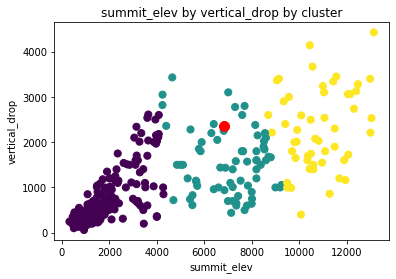

In [39]:
plt.scatter(dfo['summit_elev'], dfo['vertical_drop'], c=dfo['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(big_mountain['summit_elev'], big_mountain['vertical_drop'], c='red', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

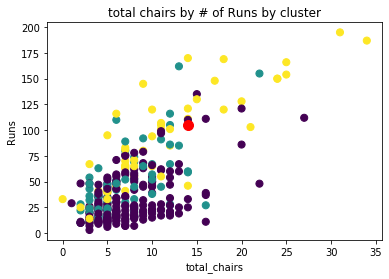

In [41]:
plt.scatter(dfo['total_chairs'], dfo['Runs'], c=dfo['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(big_mountain['total_chairs'], big_mountain['Runs'], c='red', s=100)
plt.xlabel('total_chairs')
plt.ylabel('Runs')
plt.title('total chairs by # of Runs by cluster')
plt.savefig('figures/fig2.png',bbox_inches='tight')

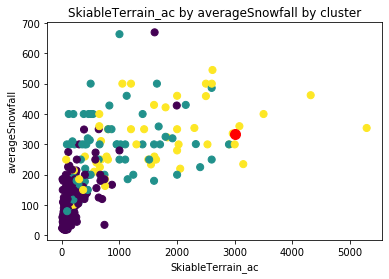

In [42]:
plt.scatter(dfo['SkiableTerrain_ac'], dfo['averageSnowfall'], c=dfo['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(big_mountain['SkiableTerrain_ac'], big_mountain['averageSnowfall'], c='red', s=100)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('averageSnowfall')
plt.title('SkiableTerrain_ac by averageSnowfall by cluster')
plt.savefig('figures/fig3.png',bbox_inches='tight')

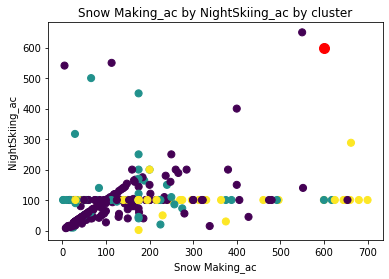

In [43]:
plt.scatter(dfo['Snow Making_ac'], dfo['NightSkiing_ac'], c=dfo['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(big_mountain['Snow Making_ac'], big_mountain['NightSkiing_ac'], c='red', s=100)
plt.xlabel('Snow Making_ac')
plt.ylabel('NightSkiing_ac')
plt.title('Snow Making_ac by NightSkiing_ac by cluster')
plt.savefig('figures/fig4.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [44]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [50]:
performance_metrics = {'R_squared':var_score2, 'mean_abs_error':mae2}
model_performance = pd.DataFrame(performance_metrics, index=[0])
model_performance

,R_squared,mean_abs_error
0,0.871796,6.645676


In [51]:
coeffs2.to_csv('data/model_coefficients.csv')
model_performance.to_csv('data/model_performance.csv')